In [18]:

import os
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sb

import numpy as np
import pandas as pd

pd.options.display.max_columns = 200
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [19]:
df = pd.read_csv("fifa_data2.csv")
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [20]:
df.sort_values(by='Potential')[::-1]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
25,25,231747,K. Mbappé,19,https://cdn.sofifa.org/players/4/19/231747.png,France,https://cdn.sofifa.org/flags/18.png,88,95,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€81M,€100K,2118,Right,3.0,4.0,5.0,High/ Medium,Lean,Yes,RM,10.0,"Jul 1, 2018",NaN,2022,5'10,161lbs,85+3,85+3,85+3,87+3,87+3,87+3,87+3,87+3,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,66+3,62+3,62+3,62+3,66+3,62+3,54+3,54+3,54+3,62+3,77.0,88.0,77.0,82.0,78.0,90.0,77.0,63.0,73.0,91.0,96.0,96.0,92.0,87.0,83.0,79.0,75.0,83.0,71.0,78.0,62.0,38.0,88.0,82.0,70.0,86.0,34.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0,€166.1M
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
15,15,211110,P. Dybala,24,https://cdn.sofifa.org/players/4/19/211110.png,Argentina,https://cdn.sofifa.org/flags/52.png,89,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€89M,€205K,2092,Left,3.0,3.0,4.0,High/ Medium,Normal,Yes,LF,21.0,"Jul 1, 2015",NaN,2022,5'10,165lbs,83+3,83+3,83+3,87+3,86+3,86+3,86+3,87+3,87+3,87+3,87+3,86+3,79+3,79+3,79+3,86+3,62+3,58+3,58+3,58+3,62+3,56+3,45+3,45+3,45+3,56+3,82.0,84.0,68.0,87.0,88.0,92.0,88.0,88.0,75.0,92.0,87.0,83.0,91.0,86.0,85.0,82.0,75.0,80.0,65.0,88.0,48.0,32.0,84.0,87.0,86.0,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,€153.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

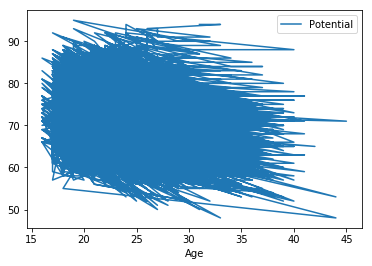

In [21]:
df.plot('Age', 'Potential')

In [28]:
alt.Chart(df).mark_point().encode(
    x='Name',
    y='Potential',
    color='Nationality',
).interactive()

MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000). For information on how to plot larger datasets in Altair, see the documentation

Chart({
  data:        Unnamed: 0      ID                  Name  Age  \
  0               0  158023              L. Messi   31   
  1               1   20801     Cristiano Ronaldo   33   
  2               2  190871             Neymar Jr   26   
  3               3  193080                De Gea   27   
  4               4  192985          K. De Bruyne   27   
  5               5  183277             E. Hazard   27   
  6               6  177003             L. Modrić   32   
  7               7  176580             L. Suárez   31   
  8               8  155862          Sergio Ramos   32   
  9               9  200389              J. Oblak   25   
  10             10  188545        R. Lewandowski   29   
  11             11  182521              T. Kroos   28   
  12             12  182493              D. Godín   32   
  13             13  168542           David Silva   32   
  14             14  215914              N. Kanté   27   
  15             15  211110             P. Dybala   24   


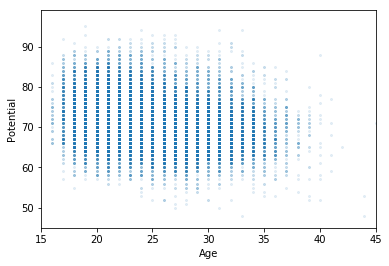

In [36]:
ax = df.plot(kind='scatter',x='Age',y='Potential',s=4,alpha=.1)
ax.set_xlim((15,45))
ax.set_xscale('linear')

ax.set_ylim((45,99))
ax.set_yscale('linear')

In [38]:
df.sort_values(by='Value')[::-1]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
400,400,164835,L. Fabiański,33,https://cdn.sofifa.org/players/4/19/164835.png,Poland,https://cdn.sofifa.org/flags/37.png,81,81,West Ham United,https://cdn.sofifa.org/teams/2/light/19.png,€9M,€70K,1212,Right,2.0,2.0,1.0,Medium/ Medium,Normal,Yes,GK,22.0,"Jun 20, 2018",NaN,2021,6'3,183lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,13.0,11.0,20.0,17.0,14.0,18.0,12.0,32.0,22.0,50.0,47.0,52.0,71.0,44.0,14.0,68.0,25.0,65.0,20.0,43.0,16.0,15.0,52.0,22.0,63.0,14.0,12.0,13.0,79.0,83.0,70.0,80.0,84.0,€17.1M
1154,1154,201939,C. Piccini,25,https://cdn.sofifa.org/players/4/19/201939.png,Italy,https://cdn.sofifa.org/flags/27.png,77,80,Valencia CF,https://cdn.sofifa.org/teams/2/light/461.png,€9M,€29K,1838,Right,1.0,2.0,3.0,Medium/ High,Normal,No,RB,21.0,"Jul 23, 2018",NaN,2022,6'2,174lbs,61+2,61+2,61+2,65+2,64+2,64+2,64+2,65+2,64+2,64+2,64+2,68+2,67+2,67+2,67+2,68+2,75+2,73+2,73+2,73+2,75+2,75+2,75+2,75+2,75+2,75+2,73.0,32.0,64.0,71.0,29.0,73.0,62.0,37.0,59.0,74.0,74.0,76.0,63.0,77.0,65.0,68.0,70.0,81.0,78.0,35.0,74.0,78.0,64.0,55.0,35.0,79.0,73.0,80.0,78.0,8.0,9.0,5.0,7.0,11.0,€19.6M
1133,1133,225474,Sidcley,25,https://cdn.sofifa.org/players/4/19/225474.png,Brazil,https://cdn.sofifa.org/flags/54.png,77,80,Dynamo Kyiv,https://cdn.sofifa.org/teams/2/light/101047.png,€9M,€1K,2055,Left,1.0,3.0,3.0,Medium/ Medium,Stocky,No,LM,17.0,"Jul 10, 2018",NaN,2023,5'9,165lbs,70+2,70+2,70+2,74+2,73+2,73+2,73+2,74+2,74+2,74+2,74+2,74+2,75+2,75+2,75+2,74+2,76+2,75+2,75+2,75+2,76+2,75+2,73+2,73+2,73+2,75+2,63.0,63.0,58.0,77.0,48.0,80.0,69.0,52.0,73.0,75.0,78.0,83.0,82.0,76.0,83.0,69.0,71.0,83.0,71.0,69.0,67.0,80.0,76.0,69.0,59.0,68.0,68.0,81.0,77.0,15.0,10.0,9.0,7.0,14.0,€19.6M
1135,1135,186307,M. Fabián,28,https://cdn.sofifa.org/players/4/19/186307.png,Mexico,https://cdn.sofifa.org/flags/83.png,77,77,Eintracht Frankfurt,https://cdn.sofifa.org/teams/2/light/1824.png,€9M,€36K,1966,Right,2.0,4.0,4.0,High/ Medium,Normal,Yes,CAM,8.0,"Jan 1, 2016",NaN,2019,5'7,143lbs,73+2,73+2,73+2,75+2,74+2,74+2,74+2,75+2,75+2,75+2,75+2,74+2,71+2,71+2,71+2,74+2,58+2,57+2,57+2,57+2,58+2,54+2,48+2,48+2,48+2,54+2,74.0,72.0,61.0,77.0,77.0,78.0,78.0,78.0,74.0,78.0,69.0,66.0,86.0,75.0,86.0,81.0,67.0,71.0,64.0,80.0,64.0,34.0,74.0,74.0,75.0,76.0,20.0,38.0,34.0,14.0,11.0,8.0,15.0,13.0,€15.3M
1136,1136,192708,Carlos Eduardo,28,https://cdn.sofifa.org/players/4/19/192708.png,Brazil,https://cdn.sofifa.org/flags/54.png,77,77,Al Hilal,https://cdn.sofifa.org/teams/2/light/605.png,€9M,€41K,1999,Right,2.0,4.0,4.0,High/ Medium,Normal,No,CAM,3.0,"Jul 5, 2015",NaN,2020,6'0,163lbs,76+2,76+2,76+2,75+2,76+2,76+2,76+2,75+2,76+2,76+2,76+2,75+2,73+2,73+2,73+2,75+2,64+2,65+2,65+2,65+2,64+2,62+2,61+2,61+2,61+2,62+2,76.0,79.0,76.0,74.0,75.0,74.0,76.0,75.0,75.0,78.0,65.0,74.0,72.0,77.0,51.0,77.0,69.0,68.0,78.0,74.0,60.0,55.0,80.0,79.0,75.0,72.0,57.0,50.0,38.0,8.0,8.0,10.0,6.0,10.0,€15.3M
1761,1761,229723,M. Jensen,22,https://cdn.sofifa.org/players/4/19/229723.png,Denmark,https://cdn.sofifa.org/flags/13.png,75,81,RC Celta,https://cdn.sofifa.org/teams/2/light/450.png,€9M,€19K,1988,Right,1.0,4.0,3.0,Medium/ Medium,Lean,No,CM,18.0,"Aug 8, 2018",NaN,2023,5'8,150lbs,67+2,67+2,67+2,72+2,72+2,72+2,72+2,72+2,74+2,74+2,74+2,73+2,73+2,73+

In [48]:
national_df = pd.pivot_table(columns='Nationality',index='Age',values='Overall',data=df,aggfunc='sum')

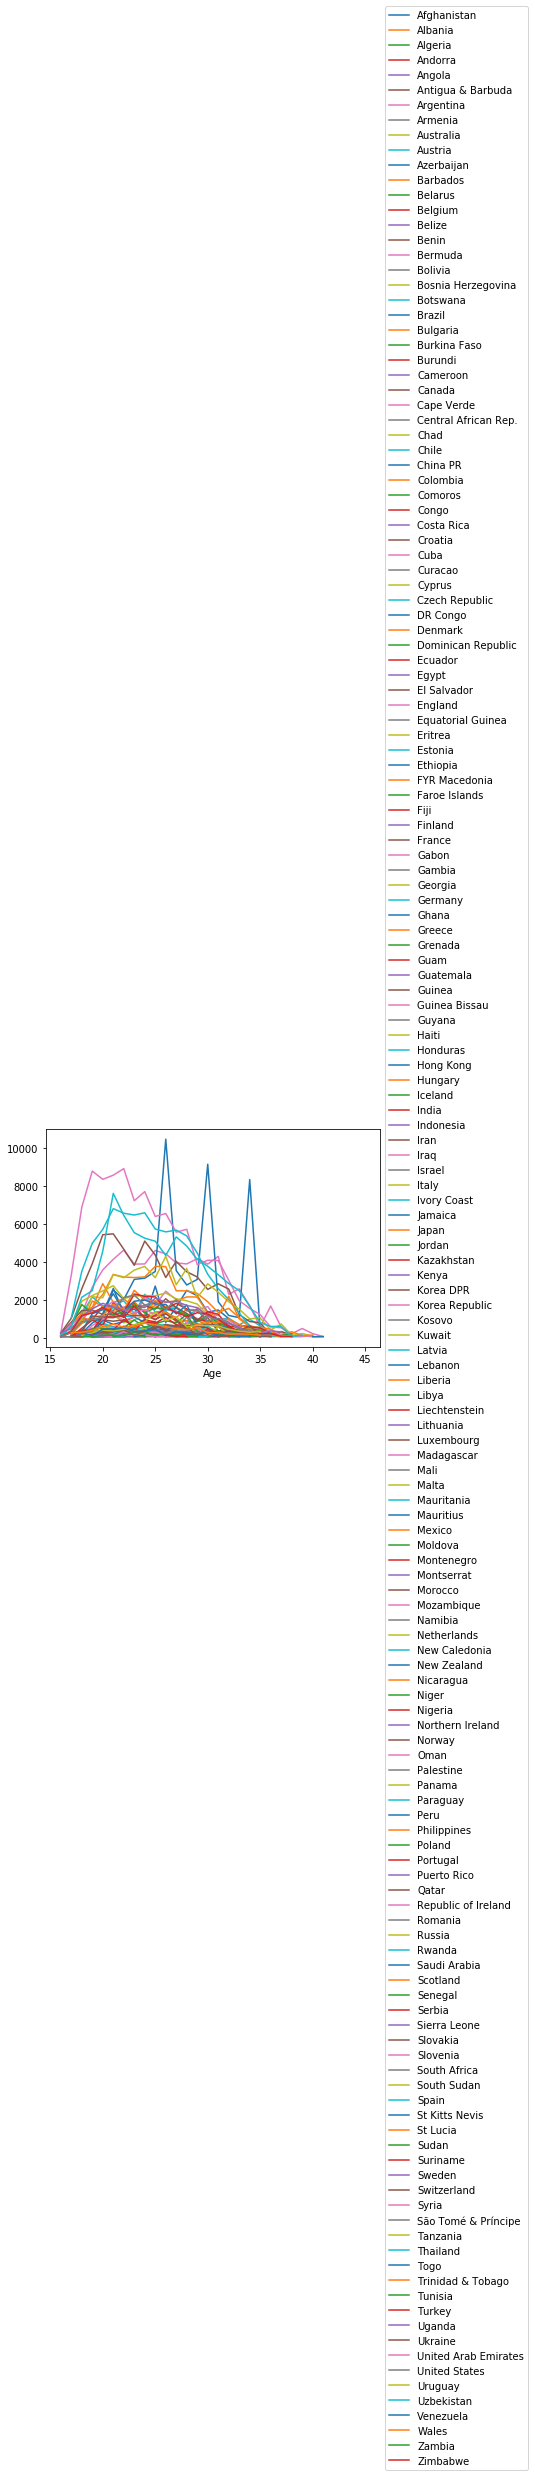

In [46]:
ax = national_df.plot(legend=False)
ax.legend(loc='center left',bbox_to_anchor = (1,.5))

In [42]:
df.sort_values(by='Wage')[::-1]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3087,3087,232905,J. Ito,25,https://cdn.sofifa.org/players/4/19/232905.png,Japan,https://cdn.sofifa.org/flags/163.png,73,75,Kashiwa Reysol,https://cdn.sofifa.org/teams/2/light/101145.png,€4.9M,€9K,1860,Right,1.0,3.0,3.0,High/ Medium,Lean,No,RM,14.0,"Jan 8, 2016",NaN,2021,5'9,150lbs,67+2,67+2,67+2,71+2,70+2,70+2,70+2,71+2,69+2,69+2,69+2,72+2,66+2,66+2,66+2,72+2,69+2,64+2,64+2,64+2,69+2,67+2,61+2,61+2,61+2,67+2,73.0,66.0,54.0,68.0,46.0,76.0,51.0,45.0,52.0,67.0,85.0,91.0,72.0,64.0,70.0,63.0,54.0,87.0,66.0,57.0,64.0,67.0,72.0,71.0,57.0,59.0,54.0,60.0,56.0,13.0,12.0,15.0,5.0,7.0,€6.5M
5742,5742,183578,S. Gonther,31,https://cdn.sofifa.org/players/4/19/183578.png,Germany,https://cdn.sofifa.org/flags/21.png,69,69,SG Dynamo Dresden,https://cdn.sofifa.org/teams/2/light/503.png,€700K,€9K,1471,Right,1.0,4.0,2.0,Medium/ Medium,Normal,No,CB,26.0,"Jul 1, 2017",NaN,2020,6'1,194lbs,46+2,46+2,46+2,43+2,44+2,44+2,44+2,43+2,44+2,44+2,44+2,45+2,47+2,47+2,47+2,45+2,56+2,59+2,59+2,59+2,56+2,60+2,68+2,68+2,68+2,60+2,40.0,28.0,70.0,50.0,14.0,32.0,32.0,28.0,46.0,47.0,66.0,66.0,57.0,63.0,58.0,54.0,81.0,41.0,79.0,29.0,70.0,68.0,30.0,46.0,30.0,68.0,72.0,69.0,65.0,7.0,13.0,6.0,8.0,6.0,€1.1M
3582,3582,210296,A. Henríquez,24,https://cdn.sofifa.org/players/4/19/210296.png,Chile,https://cdn.sofifa.org/flags/55.png,72,75,Universidad de Chile,https://cdn.sofifa.org/teams/2/light/15029.png,€4M,€9K,1734,Right,1.0,4.0,3.0,High/ Low,Normal,No,ST,9.0,"Jul 1, 2018",NaN,2022,5'9,161lbs,71+2,71+2,71+2,68+2,69+2,69+2,69+2,68+2,66+2,66+2,66+2,66+2,59+2,59+2,59+2,66+2,48+2,45+2,45+2,45+2,48+2,46+2,41+2,41+2,41+2,46+2,59.0,76.0,72.0,62.0,74.0,69.0,53.0,56.0,57.0,68.0,73.0,76.0,71.0,67.0,73.0,78.0,68.0,64.0,61.0,65.0,42.0,12.0,70.0,60.0,71.0,71.0,18.0,33.0,26.0,12.0,16.0,10.0,15.0,7.0,€5.9M
6077,6077,204153,Y. Stark,27,https://cdn.sofifa.org/players/4/19/204153.png,Germany,https://cdn.sofifa.org/flags/21.png,69,70,SV Darmstadt 98,https://cdn.sofifa.org/teams/2/light/110502.png,€1M,€9K,1906,Right,1.0,4.0,2.0,Medium/ Medium,Normal,No,CDM,25.0,"Feb 1, 2015",NaN,2020,6'1,179lbs,65+2,65+2,65+2,63+2,64+2,64+2,64+2,63+2,64+2,64+2,64+2,64+2,65+2,65+2,65+2,64+2,67+2,68+2,68+2,68+2,67+2,67+2,69+2,69+2,69+2,67+2,58.0,56.0,68.0,69.0,55.0,62.0,59.0,56.0,63.0,68.0,68.0,69.0,67.0,67.0,64.0,77.0,79.0,78.0,78.0,70.0,81.0,64.0,57.0,61.0,64.0,71.0,68.0,69.0,67.0,8.0,7.0,14.0,8.0,7.0,€1.7M
5471,5471,184781,D. Petrić,30,https://cdn.sofifa.org/players/4/19/184781.png,Serbia,https://cdn.sofifa.org/flags/51.png,70,70,En Avant de Guingamp,https://cdn.sofifa.org/teams/2/light/62.png,€1.1M,€9K,1021,Right,1.0,2.0,1.0,Medium/ Medium,Normal,No,GK,30.0,"Aug 31, 2017",NaN,2019,6'1,176lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,12.0,11.0,18.0,16.0,14.0,10.0,12.0,13.0,21.0,47.0,46.0,34.0,69.0,41.0,25.0,57.0,30.0,57.0,14.0,19.0,13.0,12.0,25.0,22.0,53.0,11.0,13.0,12.0,71.0,62.0,59.0,71.0,73.0,€2.3M
4530,4530,207805,L. Sadiku,26,https://cdn.sofifa.org/players/4/19/207805.png,Kosovo,https://cdn.sofifa.org/flags/219.png,71,73,Kasimpaşa SK,https://cdn.sofifa.org/teams/2/light/111339.png,€2.4M,€9K,1803,Right,1.0,3.0,2.0,Medium/ High,Lean,No,CDM,6.0,"Aug 18, 2016",NaN,2019,6'1,154lbs,58+2,58+2,58+2,56+2,59+2,59+2,59+2,56+2,61+2,61+

In [54]:
wage_df = pd.pivot_table(columns='Club',index='Age',values='Potential',data=df,aggfunc='sum')

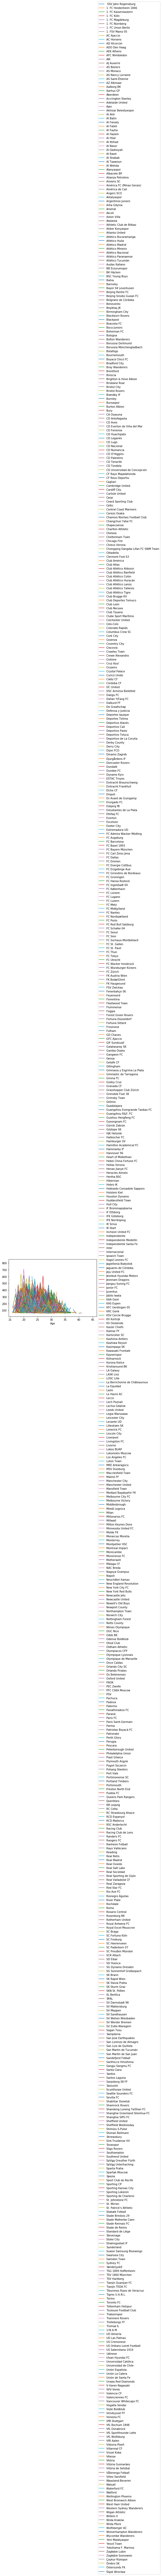

In [55]:
ax = wage_df.plot(legend=False)
ax.legend(loc='center left',bbox_to_anchor = (1,.5))